# Classifica√ß√£o de textos - An√°lise de Sentimentos
## Processamento de Linguagem Natural
Nesta aula continuaremos trabalhando com Classifica√ß√£o de textos, por√©m agora focaremos em uma tarefa espec√≠fica, chamada de **An√°lise de Sentimentos**. 

O objetivo √© que ao final desta aula voc√™:
1. Entenda o que √© a **An√°lise de Sentimentos**
2. Saiba treinar um classificador supervisionado para realizar an√°lise de sentimentos usando um corpus anotado
3. Aprenda a utilizar a biblioteca Polyglot do Python que j√° possui m√©todos para identificar polaridade de textos em portugu√™s
4. Acesse API do Twitter para obter dados em tempo real de redes sociais




### **O que √© a An√°lise de Sentimentos?**

√â a interpreta√ß√£o e classifica√ß√£o de emo√ß√µes relativas a um texto, sendo estas emo√ß√µes expl√≠citas declaradas no texto ou impl√≠citas.

![An√°lise de sentimentos. Fonte: https://monkeylearn.com/sentiment-analysis/](https://docs.google.com/uc?export=download&id=1okG1oHXPhnZiBBTtpZG4b3VdaWovCndT)

√â uma tarefa de PLN/Machine Learning que permite empresas identificarem os sentimentos dos consumidores em rela√ß√£o a produtos, marcas ou servi√ßos, atrav√©s de opini√µes deixadas em redes sociais ou em canais de comunica√ß√£o da empresa.


















### **Como treinar um classificador para realizar a An√°lise de Sentimentos?**
Iremos desenvolver nosso classificador, utilizando uma abordagem supervisionada, ou seja, precisaremos de dados rotulados com suas respectivas emo√ß√µes.

O pipeline de execu√ß√£o √© muito similar aos exemplos de classifica√ß√£o realizados na √∫ltima semana, o que muda efetivamente s√£o as classes/categorias envolvidas.

#### Dados
Para este exemplo iremos trabalhar com uma [base de dados de not√≠cias](https://www.aclweb.org/anthology/W15-5616.pdf), rotulada com as emo√ß√µes b√°sicas de [Ekman](https://www.tandfonline.com/doi/abs/10.1080/02699939208411068): **alegria**, **tristeza**, **raiva**, **medo**, **repugn√¢ncia** e **surpresa**. Em caso de aus√™ncia de emo√ß√£o, a categoria **neutro** foi aplicada.



> **IMPORTANTE**: Fa√ßa o upload da base de dados para seu ambiente Google Colab ou Jupyter Notebook! Segue o [link](https://drive.google.com/file/d/12-mbbvHtnDVRTbQnhmOfnIXppbQ0hoyn/view?usp=sharing) para acesso.



#### Fluxo de execu√ß√£o
Vamos seguir o seguinte fluxo de processamento dos dados:


1.   Abrir o corpus
2.   Remover as stop-words
3.   Aplicar stemmer
4.   Gerar o Bag of Words
5.   Treinar o modelo SVM
6.   Predizer/Avaliar o modelo



In [3]:
import pandas as pd
from numpy import True_

f = open("/content/analise-sentimentos-2000-noticias.txt", "r", encoding="utf-8-sig")
linhas = f.readlines()

corpus_textos = []
rotulo = []

# Percorre as 2000 linhas
for linha in linhas:

  # Separa texto e r√≥tulo/categoria/emo√ß√£o
  item = linha.split(";;")
  if item[0] != 'surpresa':
    rotulo.append(item[0])
    corpus_textos.append(item[1])
    
    df = pd.Series(rotulo)
        
    rotulo2 = df.replace(['alegria','tristeza','raiva', 'medo', 'desgosto', 'surpresa'],['positivo', 'negativo','negativo', 'negativo', 'negativo', ''])

    corpus_rotulos = rotulo2

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Comparando o tamanho dos corpus ap√≥s edi√ß√£o do arquivo. 

tamanho_rotulos = len(corpus_rotulos)
print('Esse √© o tamanho do corpus de r√≥tulos: ', tamanho_rotulos)
tamanho_textos = len(corpus_textos)
print('Esse √© o tamanho do corpus de textos: ', tamanho_rotulos)

Esse √© o tamanho do corpus de r√≥tulos:  1748
Esse √© o tamanho do corpus de textos:  1748


In [6]:
# 5 primeiros textos
corpus_textos[0:10]

['ir√£ liberta vi√∫va condenada ao apedrejamento, diz comit√™ internacional. a vi√∫va iraniana sakineh mohammadi-ashtiani, condenada √† morte por apedrejamento, foi libertada juntamente com o seu filho e o seu advogado, anunciou nesta quinta-feira (9) o comit√™ internacional contra apedrejamento, sediado na alemanha.\n',
 'haiti sofre com c√≥lera depois da passagem do furac√£o sandy. ap√≥s a passagem do furac√£o sandy pelo haiti, o pa√≠s vive as dificuldades da reconstru√ß√£o, al√©m de problemas causados pela contamina√ß√£o da bact√©ria que causa o c√≥lera.\n',
 'enchentes causam a morte de 4 pessoas em al: v√≠timas s√£o m√£e, filho, idosa de 100 anos e adolescente. defesa civil da capital j√° registrou mais de 30 ocorr√™ncias.\n',
 'sem detalhes do que ser√° discutido, revis√£o do plano diretor come√ßa na segunda (17). dez oficinas, 19 audi√™ncias p√∫blicas e canal interativo ser√£o os meios de participa√ß√£o popular; ippuc pretende enviar plano revisado √† c√¢mara at√© o in√≠cio de d

In [7]:
# 5 primeiros r√≥tulos
corpus_rotulos[0:10]

0    positivo
1    negativo
2    negativo
3      neutro
4      neutro
5    negativo
6    negativo
7      neutro
8    positivo
9      neutro
dtype: object

Em nossos exemplos de classifica√ß√£o anteriores, separamos parte do banco de dados para **TREINAMENTO** e outra parte para **TESTE**, nesse tipo de avalia√ß√£o que chamamos de **hold-out**.

Existem outras formas de realizar a avalia√ß√£o, inclusive mais indicadas de acordo com a situa√ß√£o, mas isto n√£o est√° no escopo de nossa disciplina, caso queira saber mais m√©todos de avalia√ß√£o como o **cross-validation**, leia [este post](https://medium.com/@eijaz/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f).

In [8]:
from sklearn.model_selection import train_test_split

# O pr√≥prio sklearn tem um m√©todo para dividir a base de dados em treinamento e teste
# Neste caso estamos deixando 90% para treinamento e 10% para testes

corpus_treinamento, corpus_teste, rotulos_treinamento, rotulos_teste = train_test_split(corpus_textos, corpus_rotulos, test_size=0.10, random_state=1)

In [9]:
tamanhoTextoTreinamento = len(corpus_treinamento)
print('Esse √© o tamanho do corpus de texto para treinamento: ', tamanhoTextoTreinamento)
tamanhoRotuloTreinamento = len(rotulos_treinamento)
print('Esse √© o tamanho do corpus de r√≥tulos para treinamento: ', tamanhoRotuloTreinamento)
tamanhoTextoTeste = len(corpus_teste)
print('\nEsse √© o tamanho do corpus de textos para teste: ', tamanhoTextoTeste)
tamanhoRotulosTeste = len(rotulos_teste)
print('Esse √© o tamanho do corpus de r√≥tulos para teste: ', tamanhoRotulosTeste)

Esse √© o tamanho do corpus de texto para treinamento:  1573
Esse √© o tamanho do corpus de r√≥tulos para treinamento:  1573

Esse √© o tamanho do corpus de textos para teste:  175
Esse √© o tamanho do corpus de r√≥tulos para teste:  175


Vamos deixar preparada uma fun√ß√£o para pr√©-processar os textos, utilizando uma lista de stop-words com novos itens, o stemming e normaliza√ß√£o dos textos.

In [10]:
import nltk
from nltk import tokenize
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('portuguese') #carrega stopwords da lingua portuguesa dispon√≠veis no NLTK
stopwords += (',','.','(',')','"',"'",'¬¥','`','!','$','%','&','...','-',':',';','?','``','\'\'') #acrescenta simbolos
stopwords += ('a','e','i','o','u','A','E','I','O','U') #acrescenta tamb√©m vogais

stemmer = nltk.stem.RSLPStemmer()

def my_preprocessor(text):
    
    # Faz a remo√ß√£o de tudo que n√£o seja letra (essa adi√ß√£o √© resposta ao exerc√≠cio n√∫mero 3) 
    text.replace("[^a-zA-Z#]", " ")
    
    # Normaliza para min√∫sculas
    text=text.lower()
    
    # Tokeniza
    words = tokenize.word_tokenize(text, language='portuguese')
    # Remove stop-words
    words_no_stopwords = [word for word in words if not word in stopwords]
    # Aplica stemming
    stemmed_words=[stemmer.stem(word=word) for word in words_no_stopwords]
    return ' '.join(stemmed_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Agora vamos extrair os atributos do texto (gerar a representa√ß√£o vetorial - bag of words) e criar nosso pipeline de classifica√ß√£o usando o classificador SVM.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Primeiro aplica o BoW, depois envia dados ao classificador SVM
# (SEM retirada de stop-words e stemming)
#sent_clf = Pipeline([('vect', CountVectorizer()),('clf', SVC(kernel='linear', C=1))])

# Depois de executar uma vez, verifique os resultados e compare-os depois de descomentar a linha abaixo, onde retiramos as stop-words e aplicamos stemming
# (COM retirada de stop-words e stemming)

# Em resposta ao exerc√≠cio n√∫mero 2: foi adicionado a remo√ß√£o de acentos e "ngram_range". Para o classificador, foi 
sent_clf = Pipeline([('vect', CountVectorizer(strip_accents ='unicode', ngram_range=(1,2), preprocessor = my_preprocessor)),('clf', SVC(kernel='linear', C=1, probability=True))])

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

#Essa √© a resposta ao exerc√≠cio 4, onde pede-se que seja testado com outro modelo de classifica√ß√£o. Neste caso, Naive Bayes.
sent_clf2 = Pipeline([('vect', CountVectorizer(strip_accents ='unicode', ngram_range=(1,2), preprocessor = my_preprocessor)), ('clf', MultinomialNB(alpha=0.0))])

In [13]:
# Inicia treinamento 
sent_clf = sent_clf.fit(corpus_treinamento, rotulos_treinamento)

In [14]:
# Inicia treinamento do modelo editado (clf2)
sent_clf2 = sent_clf2.fit(corpus_treinamento, rotulos_treinamento)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


J√° temos nosso modelo treinado! Agora vamos predizer a base de teste e avaliar os resultados.

In [15]:
# Prediz base de teste
rotulos_preditos = sent_clf.predict(corpus_teste)

In [16]:
# Prediz base de teste para o modelo editado
rotulos_preditos = sent_clf2.predict(corpus_teste)

In [17]:
#Apresenta o resultado de acuracidade do modelo original (SVM)

from sklearn.metrics import accuracy_score
rotulos_preditos = sent_clf.predict(corpus_teste)
print("Acur√°cia do modelo original: ",accuracy_score(rotulos_preditos, rotulos_teste))

Acur√°cia do modelo original:  0.7942857142857143


In [18]:
#Apresenta o resultado de acuracidade do modelo editado (Naive Bayes)

from sklearn.metrics import accuracy_score
rotulos_preditos = sent_clf2.predict(corpus_teste)
print("Acur√°cia do modelo editado: ",accuracy_score(rotulos_preditos, rotulos_teste))

Acur√°cia do modelo editado:  0.7771428571428571


In [19]:
from sklearn.metrics import classification_report

# Mostra relat√≥rio completo de avalia√ß√£o
print(classification_report(rotulos_teste, rotulos_preditos))

              precision    recall  f1-score   support

    negativo       0.76      0.97      0.85       103
      neutro       0.83      0.60      0.70        58
    positivo       1.00      0.07      0.13        14

    accuracy                           0.78       175
   macro avg       0.86      0.55      0.56       175
weighted avg       0.80      0.78      0.74       175



**Modelo original do exerc√≠cio**

              precision    recall  f1-score   support

     alegria       0.00      0.00      0.00        19
    desgosto       0.44      0.26      0.33        27
        medo       0.32      0.39      0.35        18
      neutro       0.52      0.73      0.61        51
       raiva       0.29      0.29      0.29         7
    surpresa       0.42      0.47      0.44        32
    tristeza       0.66      0.59      0.62        46

    accuracy                           0.48       200
   macro avg       0.38      0.39      0.38       200
weighted avg       0.45      0.47      0.45       200


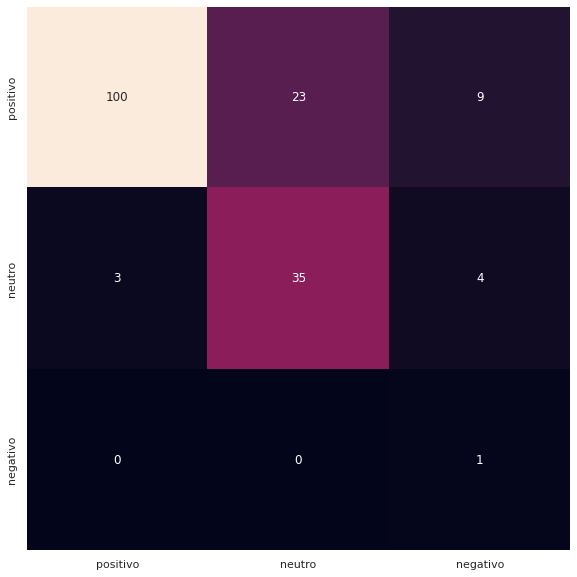

In [20]:
from sklearn.metrics import confusion_matrix

# Podemos imprimir a matriz de confus√£o para tentar entender melhor os resultados
mat = confusion_matrix(rotulos_teste, rotulos_preditos)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

rotulos_nomes = ['positivo', 'neutro', 'negativo']

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=rotulos_nomes, yticklabels=rotulos_nomes )

**Modelo original do exerc√≠cio**




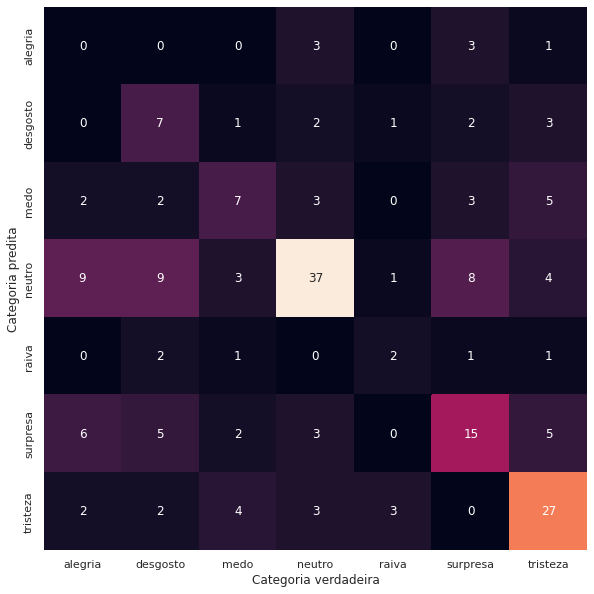



> **CONCLUS√ÉO**: Apesar de verificarmos melhoria ao pr√©-processarmos o texto, os resultados ainda s√£o regulares.

# **Detalhamento da s atividades realizadas.**


1. **Atividade 1:** Criamos um script que ignorava as linhas que continham "surpresa" e ent√£o realizamos a mudan√ßas dos labels das emo√ß√µes atrav√©s de um "replace".
2. **Atividade 2:** Para o exerc√≠cio 2, adicionamos dois novos atributos: "strip_accents" para remo√ß√£o da acentua√ß√£o, mas sem mudan√ßas de acuracidade; e "n_gram(1,2)", que melhorou um pouco a acuracidade do modelo. J√° para o classificador, no original tentei mudar o kernel para "sigmoid" mas houve a piora da acuracidade em 0.03% (de 0.8 para 0.77) e ent√£o foi removido e voltei ao original, al√©m da mudan√ßa do kernel, tentei a adi√ß√£o do atributo "probability", que n√£o mudou a acuracidade e foi mantido.
3. **Atividade 3:** A troca do para TfidfVectorizer na realidade apresentou queda na acuracidade de predi√ß√£o das emo√ß√µes, e ent√£o mantive o "countvectorize", mas adicionei na etapa de pr√©-processamento a remo√ß√£o de tudo que n√£o era letra (text.replace("[^a-zA-Z#]", " ")), embora isso n√£o tenha apresentado melhorias significativas no modelo. 
4. **Atividade 4:** Utilizamos o classificador Naive Bayes. Testamos com outros classificadores tamb√©m, que embora nenhum tenha chego na acuracidade do modelo original (SVC -> 0.8), o Naive Bayes apresentou acuracidade de 0.77. Alguns dos demais testes: RandomForest -> 0.71, SGD -> 0.77 e KNeighborsClassifier -> 0.6.





#### **Atividade Somativa 2 - Como podemos tentar melhorar os resultados?**

**1) Redu√ß√£o da granularidade dos sentimentos**
Como podemos ver na matriz de confus√£o o classificador tem v√°rios pontos de erro, em todas emo√ß√µes. E se modificarmos o corpus para ao inv√©s de 7 emo√ß√µes, trabalhar com as 3 cl√°ssicas (positivo, neutro, negativo)?

Vamos ent√£o adotar a seguinte sistem√°tica de atualiza√ß√£o da base de dados:

A classe "**positivo**" ser√° obtida utilizando-se as inst√¢ncias da base original rotuladas como "alegria". 

A classe "**negativo**" ser√° obtida utilizando-se as inst√¢ncias rotuladas como "raiva", "medo", "desgosto" e "tristeza". 

J√° a classe "**neutro**", utilizar√° as inst√¢ncias da base original rotuladas como "neutro". 

As inst√¢ncias rotuladas como "surpresa" n√£o ser√£o utilizadas.

Crie um novo arquivo para esta base de dados atualizada, carregue-o em nosso notebook e compare os resultados.

**2) Configura√ß√£o dos par√¢metros de extra√ß√£o de atributos e do classificador**
Altere a configura√ß√£o de pelo menos um atributo gerado pela vetoriza√ß√£o das palavras (i.e., CountVectorizer) e tamb√©m pelo classificador utilizado.

**3) Adicione novas etapas de extra√ß√£o de atributos ou de pr√©-processamento**
Incorpore ao menos uma nova etapa de pr√©-processamento ou extra√ß√£o de atributos (e.g., TF-IDF) ao pipeline atual.

**4) Utilize outro classificador de texto**
Treine ao menos um novo modelo utilizando um classificador de textos diferentes. Ele pode pertencer √† biblbioteca sklearn ou qualquer outra.



### **Existe alguma ferramenta pronta que realize an√°lise de sentimentos?**
N√£o √© sempre que teremos um corpus anotado para utilizar em nossas tarefas, neste caso, existem bibliotecas que incorporam funcionalidades simples que podem ser usadas para detectar a polaridade de textos (negativo, positivo).

No caso da l√≠ngua portuguesa, a [Polyglot](https://polyglot.readthedocs.io/en/latest/index.html) tem um l√©xico de polaridade das palavras, que pode ser usado para detec√ß√£o simples de sentimentos.

In [21]:
# Ela tem algumas depend√™ncias que devem ser instaladas
!pip install -U git+https://github.com/aboSamoor/polyglot.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/aboSamoor/polyglot.git (to revision master) to /tmp/pip-req-build-zxur9uef
  Running command git clone -q https://github.com/aboSamoor/polyglot.git /tmp/pip-req-build-zxur9uef
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 41.4 MB 1.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 305 kB 51.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=70673 sha256=38c834de942545d7ca1ecb44e834752f19b9cfa89f42e714912e66f5579f0820
  Stored in directory: /tmp/pip-ephem-wheel-cache-txpkwu4g/wheels/6d/b6/83/526ac20beb2e8b06c33aea6ac5edf6a07d3de55011bcc35ee8
  Created wheel for pycld2: filename=pycl

In [22]:
import polyglot
from polyglot.text import Text
# Baixa o l√©xicos da lingua portuguesa
!polyglot download LANG:pt

[polyglot_data] Downloading collection 'LANG:pt'
[polyglot_data]    | 
[polyglot_data]    | Downloading package sgns2.pt to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    | Downloading package unipos.pt to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    | Downloading package ner2.pt to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    | Downloading package counts2.pt to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    | Downloading package transliteration2.pt to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    | Downloading package embeddings2.pt to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    | Downloading package uniemb.pt to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    | Downloading package pos2.pt to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    | Downloading package sentiment2.pt to
[polyglot_data]    |     /root/polyglot_data

In [23]:
text = Text("O filme que vimos √© realmente muito bom!")
print("{:<16}{}".format("Word", "Polarity")+"\n"+"-"*30)
for w in text.words:
    print("{:<16}{:>2}".format(w, w.polarity))

Word            Polarity
------------------------------
O                0
filme            0
que              0
vimos            0
√©                0
realmente        0
muito            1
bom              1
!                0


In [24]:
text = Text("As notas foram ruins.")
print("{:<16}{}".format("Word", "Polarity")+"\n"+"-"*30)
for w in text.words:
    print("{:<16}{:>2}".format(w, w.polarity))

Word            Polarity
------------------------------
As               0
notas            0
foram            0
ruins           -1
.                0


In [25]:
text = Text("N√£o sei o que pensar.")
print("{:<16}{}".format("Word", "Polarity")+"\n"+"-"*30)
for w in text.words:
    print("{:<16}{:>2}".format(w, w.polarity))

Word            Polarity
------------------------------
N√£o              0
sei              0
o                0
que              0
pensar           0
.                0


### **Como obter dados em tempo real de redes sociais?**
J√° vimos na disciplina que √© poss√≠vel utilizar o web-scraping para obter p√°ginas da web e percorrer a estrutura HTML em busca das informa√ß√µes. Por√©m, em alguns casos temos op√ß√µes mais r√°pidas e vi√°veis para recolher dados. Alguns sites oferecem o servi√ßo de [API](https://canaltech.com.br/software/o-que-e-api/) para acesso aos dados, onde podemos autenticar e utilizar fun√ß√µes para buscar dados em tempo real.

Em nosso exemplo, utilizaremos a [API do Twitter](https://developer.twitter.com/en/docs) para buscar tweets sobre determinado assunto.

Neste exemplo, utilizaremos as chaves de acesso da conta do professor, mas quando voc√™ for desenvolver seu script, voc√™ deve criar seu pr√≥prio token de acesso. Basta acessar sua conta no Twitter, na [p√°gina do desenvolvedor](https://developer.twitter.com/en/docs) voc√™ deve ir em Apps > Create an app.


In [26]:
import tweepy 
from tweepy import OAuthHandler 

# As chaves e tokens que voc√™ receber√° ao criar um App
consumer_key = 'iUpbJiOv2LGFZdRTSqOOFndf7'
consumer_secret = 'AVQQS4UcSI6dlRkwO3PdrNo6Iuwl9k5yE4oae18yNvACnhREzs'
access_token = '12948382-GTwHQSlj2ylAsMxsm2TT8ecYQ8fUteAfNGTqJutAP'
access_token_secret = 'U1HOAmQWkSwfiGEacEqDL59QZ8dvpBhG03yiusjyhtI2M'

api = None
try: 
  # Cria um objeto de autentica√ß√£o (OAuthHandler) 
  auth = OAuthHandler(consumer_key, consumer_secret) 
  # Define o token e senha de acesso
  auth.set_access_token(access_token, access_token_secret) 
  # Cria um novo objeto API para acessar os tweets 
  api = tweepy.API(auth) 
except: 
  print("Erro: Falha de autentica√ß√£o no Twitter") 

Uma vez que temos um objeto API autenticado, podemos fazer nossas buscas. A API oferecer v√°rios m√©todos e par√¢metros para buscar dados, basta olhar na [documenta√ß√£o da biblioteca tweepy](http://docs.tweepy.org/en/v3.5.0/api.html). N√≥s iremos utilizar o m√©todo **search()**, que funciona de maneira similar a pr√≥pria caixa de busca no site do Twitter.

In [27]:
try: 

  # Busca at√© 200 tweets utilizando a query informada
  tweets = api.search(q = 'Bolsonaro', count = 200) 

except tweepy.TweepError as e: 
  print("Erro : " + str(e)) 



> **DICA**: Estamos colocando todos trechos do processo entre [blocos try/except](https://docs.python.org/pt-br/3.8/tutorial/errors.html), assim em caso de erro, temos certeza de qual ponto do processo est√° com problemas.



Vamos fazer uma fun√ß√£o que atrav√©s da pontua√ß√£o de polaridade das palavras do tweet, obtido atrav√©s do l√©xico do polyglot, calculamos a polaridade do texto. Utilizaremos uma f√≥rmula bem simples, onde somaremos todas polaridades, se o resultado por positivo o sentimento √© positivo, se for zero √© neutro, caso menor que zero, negativo.

In [30]:
# Voc√™ pode fazer download dos l√©xicos de sentimento de cada idioma separadamente
!polyglot download sentiment2.en
!polyglot download sentiment2.tr
!polyglot download sentiment2.es
!polyglot download sentiment2.tk
!polyglot download sentiment2.fi
!polyglot download sentiment2.pt
!polyglot download sentiment2.de
!polyglot download sentiment2.it
!polyglot download sentiment2.lv
!polyglot download sentiment2.ca
!polyglot download sentiment2.la

[polyglot_data] Downloading package sentiment2.en to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package sentiment2.en is already up-to-date!
[polyglot_data] Downloading package sentiment2.tr to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package sentiment2.tr is already up-to-date!
[polyglot_data] Downloading package sentiment2.es to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package sentiment2.es is already up-to-date!
[polyglot_data] Downloading package sentiment2.tk to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package sentiment2.tk is already up-to-date!
[polyglot_data] Downloading package sentiment2.fi to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package sentiment2.fi is already up-to-date!
[polyglot_data] Downloading package sentiment2.pt to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package sentiment2.pt is already up-to-date!
[polyglot_data] Downloading package sentiment2

In [31]:
qtdeTweetsPos = 0
qtdeTweetsNeg = 0
qtdeTweetsNeu = 0
tweets_str_list = []

# Percorre os tweets encontrados
for tweet in tweets: 

  #ATEN√á√ÉO: Tenha certeza que j√° instalou e importou o polyglot acima!
  text = Text(tweet.text)

  somaP = 0
  
  # Percorre as palavras do tweet
  for palavra in text.words:
    # Soma polaridade da palavra
    somaP += palavra.polarity

  # Faz contagem das polaridades
  if somaP > 0:
    qtdeTweetsPos += 1
  elif somaP < 0:
    qtdeTweetsNeg += 1
  else:
    qtdeTweetsNeu += 1
                               
  # Imprime o tweet
  print("Polaridade: " + str(somaP) + " >>> " + tweet.text + "\n")

  tweets_str_list.append(tweet.text)

Polaridade: 0 >>> RT @FlavioBolsonaro: Cavalgada a favor de Bolsonaro, em Canhotinho (Pernambuco), no dia 25/Set/22.
O Nordeste √© Bolsonaro 22!

#BrasilVota2‚Ä¶

Polaridade: 0 >>> RT @siteptbr: üö® No Cear√°, eleitor de Bolsonaro invade bar, pergunta quem vota no Lula e logo ap√≥s mata petista esfaqueado.

A v√≠tima era pa‚Ä¶

Polaridade: -1 >>> RT @GeorgMarques: BOMBA: Rachadinha presidencial!

A Pol√≠cia Federal encontrou no telefone do principal ajudante de ordens de Jair Bolsonar‚Ä¶

Polaridade: -2 >>> RT @GuilhermeBoulos: BOMBA! PF encontrou no telefone do principal ajudante de ordens de Bolsonaro ind√≠cios de DEP√ìSITOS FRACIONADOS e SAQUE‚Ä¶

Polaridade: 0 >>> RT @_Estragao: üö®#URGENTE: Ap√≥s den√∫ncia da ativista vegana crist√£ conservadora dos animais Luisa Mel, o TSE forma maioria e determina que o‚Ä¶

Polaridade: 0 >>> @GuilhermeBoulos @felipeneto Presidente Bolsonaro vence no Primeiro turno neste domingo e Ciro alcan√ßar√° 30% eleito‚Ä¶ https://t.co/ecRm0phv4p

Polarida

> **ATEN√á√ÉO:** As vezes, o polyglot pode identificar de maneira errada o idioma do tweet, e neste caso tentar√° utilizar um recurso l√©xico que ainda n√£o foi baixado. Voc√™ pode corrigir de duas maneiras, ou usa o try/except e ignora este tweet, ou baixa o l√©xico dos idiomas envolvidos e deixa que ele calcule de maneira errada mesmo.

In [32]:
# Agora calculamos as porcentagens
print("POSITIVOS: {}%".format(100*qtdeTweetsPos/len(tweets))) 
print("NEGATIVOS: {}%".format(100*qtdeTweetsNeg/len(tweets))) 
print("NEUTROS: {}%".format(100*qtdeTweetsNeu/len(tweets))) 

POSITIVOS: 17.0%
NEGATIVOS: 51.0%
NEUTROS: 32.0%


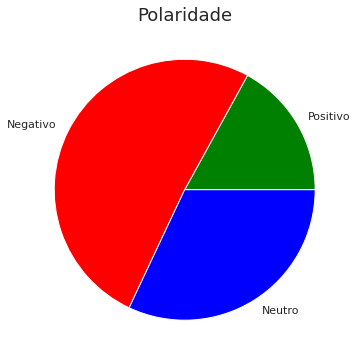

In [33]:
import matplotlib.pyplot as plt

# Podemos plotar um gr√°fico tamb√©m
fig=plt.figure(figsize=(6,6))
plt.pie([qtdeTweetsPos, qtdeTweetsNeg, qtdeTweetsNeu],labels=['Positivo', 'Negativo', 'Neutro'],colors=['green', 'red', 'blue'])
plt.ylabel('')
plt.title('Polaridade',fontsize='18')
plt.show()

Poder√≠amos tamb√©m construir uma WordCloud para entender melhor quais as palavras que est√£o mais associadas ao tema buscado.

Para isso iremos remover as stop-words e chamar uma fun√ß√£o de WordCloud.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


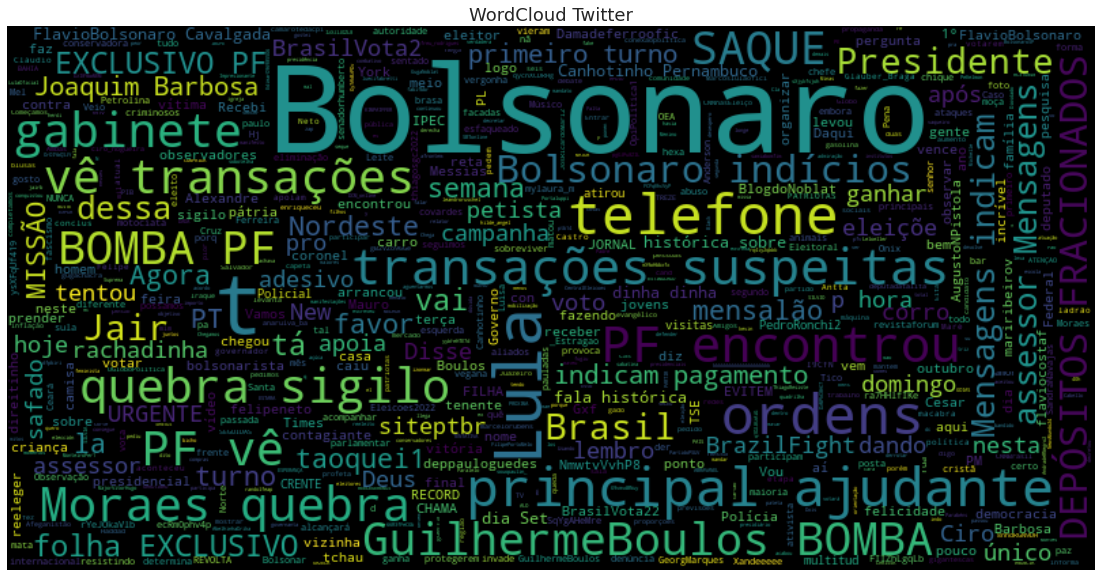

In [34]:
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
from wordcloud import WordCloud

stopword= nltk.corpus.stopwords.words('portuguese')

# Retiramos ocorr√™ncias de links e retweets       
stopword.append('https')
stopword.append('RT')
stopword.append('co')
    
# Cria uma √∫nica string com todos tweets
str_tweets = " ".join(tweets_str_list)
    
# Gera a wordcloud
wordcloud = WordCloud(max_words=2000, max_font_size=90, stopwords=stopword, height=400, width=800).generate(str_tweets)

fig = plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('WordCloud Twitter', fontsize='18')
plt.show()                                                                                                                                   
    

#### Considera√ß√µes finais
Aqui utilizamos uma abordagem BEM simples, baseada em um l√©xico de polaridade da biblioteca polyglot. Os textos provindos de redes sociais s√£o muito dif√≠ceis de processar, o ideal seria uma abordagem mais complexa, de prefer√™ncia com aprendizado supervisionado, capaz de lidar com algumas caracter√≠sticas e desafios destes textos:
- Uso de g√≠rias
- Aus√™ncia de regras ortogr√°ficas
- Uso de s√≠mbolos (emojis, hashtags)
- Presen√ßa de ironia
- Uso de hiperlinks
- entre outros

#### **Atividade complementar**
Voc√™ pode deixar o algoritmo mais robusto, ao treinar um classificador utilizando as bases rotuladas de tweets em portugu√™s, listadas nas refer√™ncias deste notebook.

## Refer√™ncias e Material complementar

* [Portuguese Tweets for Sentiment Analysis - Corpus anotado](https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis)
* [Portuguese Tweets for Sentiment Analysis using nltk and sklearn](https://www.kaggle.com/leonardoassis/portuguese-tweets-nltk-and-sklearn)
* [tweetSentBR - Corpus anotado](https://bitbucket.org/HBrum/tweetsentbr/src/master/)
* [Anotando um Corpus de Not√≠cias para a An√°lise de Sentimento: um Relato de Experi√™ncia](https://www.aclweb.org/anthology/W15-5616.pdf)
* [Twitter Sentiment Analysis using NLTK, Python](https://towardsdatascience.com/twitter-sentiment-analysis-classification-using-nltk-python-fa912578614c)
* [Creating The Twitter Sentiment Analysis Program in Python with Naive Bayes Classification](https://towardsdatascience.com/creating-the-twitter-sentiment-analysis-program-in-python-with-naive-bayes-classification-672e5589a7ed)
* [Sentiment Analysis with Python (Part 1) - Classifying IMDb Movie Reviews](https://towardsdatascience.com/sentiment-analysis-with-python-part-1-5ce197074184)
* [Twitter Developer API](https://developer.twitter.com/en/docs)
* [Sentiment Classification using Word Embeddings (Word2Vec)](https://medium.com/swlh/sentiment-classification-using-word-embeddings-word2vec-aedf28fbb8ca)
* [Sentiment Analysis on Tweets in Portuguese - Transformer and BERT](https://www.kaggle.com/viniciuscleves/sentiment-analysis-on-tweets-in-portuguese)

Esta aula foi inspirada no trabalho do [Prof. Emerson Cabrera Paraiso](http://lattes.cnpq.br/3493899263715892), a quem agradecemos pela permiss√£o de uso de sua [base de dados](https://www.aclweb.org/anthology/W15-5616.pdf).

Este notebook foi produzido por Prof. [Lucas Oliveira](http://lattes.cnpq.br/3611246009892500).